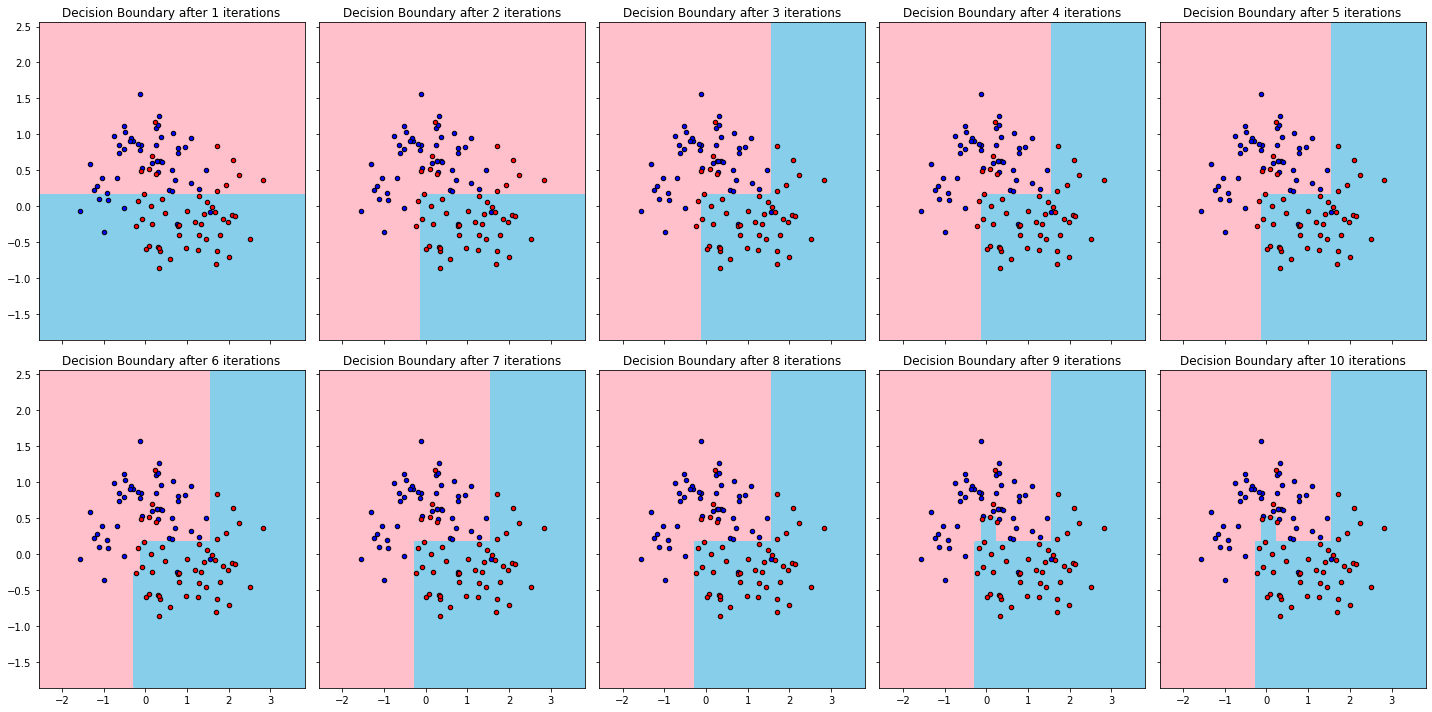

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
X, y = make_moons(n_samples=100, noise=0.3, random_state=42)

# Function to plot decision boundaries

def plot_decision_boundary(clf, X, y, iteration, ax):
    plot_colors = "br"
    plot_step = 0.02
    class_names = "AB"

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap = ListedColormap(['pink','skyblue'])

    ax.contourf(xx, yy, Z, cmap=cmap)
    ax.axis("tight")

    # Plot the training points
    for i, n, c in zip(range(2), class_names, plot_colors):
        idx = np.where(y == i)
        ax.scatter(X[idx, 0], X[idx, 1],
                   c=c, cmap=plt.cm.Paired,
                   s=20, edgecolor='k',
                   label="Class %s" % n)
    ax.set_title(f"Decision Boundary after {iteration} iterations")

# Initialize the AdaBoost classifier with a DecisionTreeClassifier as the base learner
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=1, # Start with 1 estimator
    algorithm="SAMME.R",
    learning_rate=0.5
)

fig, axs = plt.subplots(2, 5, figsize=(20, 10), sharex=True, sharey=True)
axs = axs.flatten()
iterations = 10

for i in range(iterations):
    # Train AdaBoost on the dataset
    ada_clf.n_estimators = i + 1
    ada_clf.fit(X, y)
    
    # Plot decision boundary
    plot_decision_boundary(ada_clf, X, y, i + 1, axs[i])

plt.tight_layout()
plt.savefig("DB overtime.png",transparent = True)
plt.show()


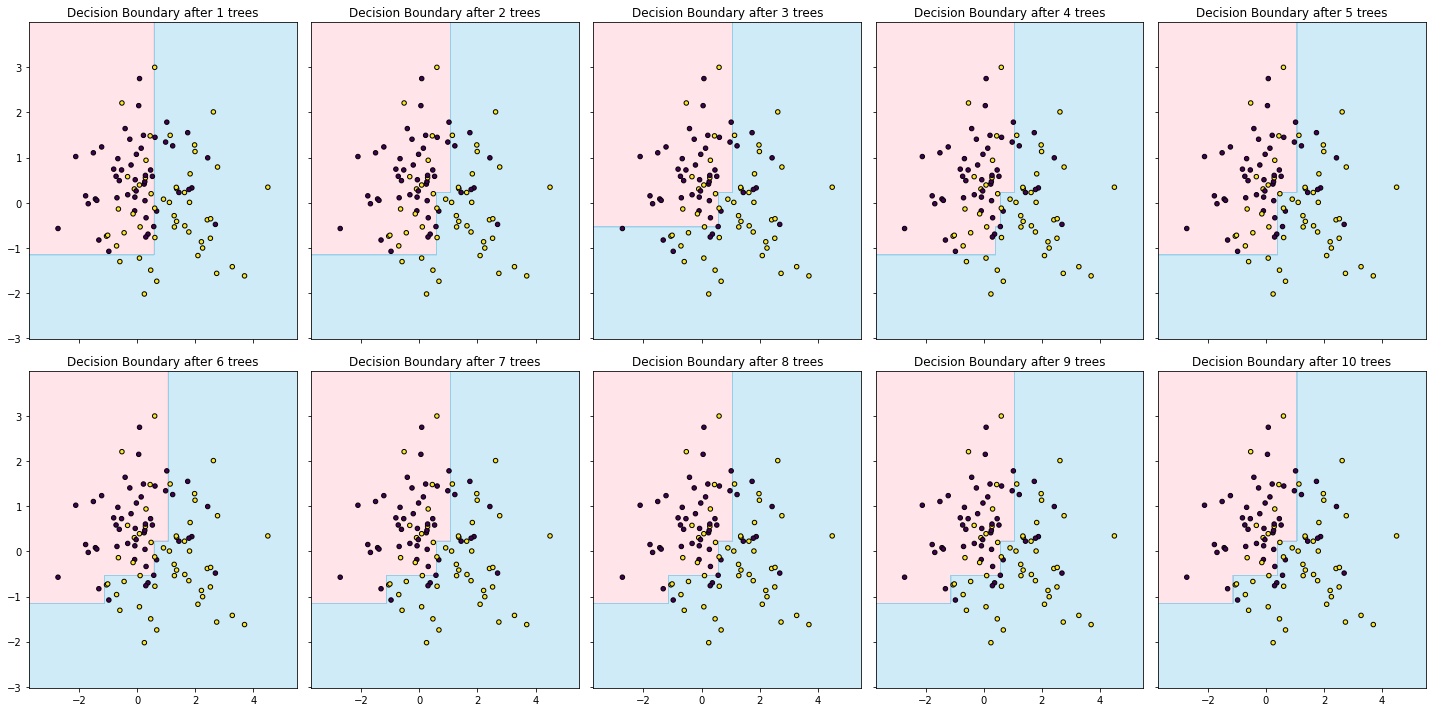

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from matplotlib.colors import ListedColormap

X, y = make_moons(n_samples=100, noise=0.9, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, iteration, ax, resolution=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap = ListedColormap(['pink','skyblue'])

    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    ax.set_title(f"Decision Boundary after {iteration} trees")

# Initialize the Gradient Boosting classifier
n_estimators = 10
clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=0.1, max_depth=2, random_state=42)

fig, axs = plt.subplots(2, 5, figsize=(20, 10), sharex=True, sharey=True)
axs = axs.flatten()

# Train and plot the decision boundary after each iteration
for i in range(n_estimators):
    clf.set_params(n_estimators=i + 1)
    clf.fit(X, y)
    
    plot_decision_boundary(clf, X, y, i + 1, axs[i])

plt.tight_layout()
plt.savefig('DB overtime.png',transparent = True)
plt.show()
